In [31]:
import warnings
warnings.filterwarnings('ignore')

In [32]:
import tensorflow as tf
tf.__version__

'2.6.0'

In [33]:
# 1. Google Drive Mount

from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
!ls -l '/content/drive/My Drive/Colab Notebooks/datasets/dogs_and_cats_small.zip'

-rw------- 1 root root 90618980 Mar 31  2021 '/content/drive/My Drive/Colab Notebooks/datasets/dogs_and_cats_small.zip'


In [35]:
!unzip '/content/drive/My Drive/Colab Notebooks/datasets/dogs_and_cats_small.zip'

Archive:  /content/drive/My Drive/Colab Notebooks/datasets/dogs_and_cats_small.zip
replace test/cats/cat.1501.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test/cats/cat.1501.jpg  
replace test/cats/cat.1502.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace test/cats/cat.1502.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: test/cats/cat.1502.jpg  
  inflating: test/cats/cat.1503.jpg  
  inflating: test/cats/cat.1504.jpg  
  inflating: test/cats/cat.1505.jpg  
  inflating: test/cats/cat.1506.jpg  
  inflating: test/cats/cat.1507.jpg  
  inflating: test/cats/cat.1508.jpg  
  inflating: test/cats/cat.1509.jpg  
  inflating: test/cats/cat.1510.jpg  
  inflating: test/cats/cat.1511.jpg  
  inflating: test/cats/cat.1512.jpg  
  inflating: test/cats/cat.1513.jpg  
  inflating: test/cats/cat.1514.jpg  
  inflating: test/cats/cat.1515.jpg  
  inflating: test/cats/cat.1516.jpg  
  inflating: test/cats/cat.1517.jpg  
  inflating: test/cats/cat

In [36]:
!ls -l

total 20
drwx------ 5 root root 4096 Sep 30 08:11 drive
drwxr-xr-x 1 root root 4096 Sep 16 13:40 sample_data
drwxr-xr-x 4 root root 4096 Sep 30 08:12 test
drwxr-xr-x 4 root root 4096 Sep 30 08:12 train
drwxr-xr-x 4 root root 4096 Sep 30 08:12 validation


In [37]:
# Optional Image Augmentation Test

# rotation_range = 40 -> 0도에서 40도 사이에서 임의의 각도로 회전
# width_shift_range = 0.2 -> 20% 픽셀 내외로 좌우 이동
# height_shift_range = 0.2 -> 20% 픽셀 내외로 상하 이동
# shear_range = 0.2 -> 0.2 라디안 내외로 시계 반대방향으로 변형
# zoom_range = 0.2 -> 80% 에서 120% 범위에서 확대/축소
# horizontal_flip = True -> 수평방향 뒤집기
# vertical_flit = True -> 수직방향 뒤집기
# fill_mode = 'nearest' -> 주변 픽셀로 이미지 채우기

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range = 40,
                             width_shift_range = 0.2,
                             height_shift_range = 0.2,
                             shear_range = 0.2,
                             zoom_range = 0.2,
                             horizontal_flip = True,
                             vertical_flip = True,
                             fill_mode = 'nearest')

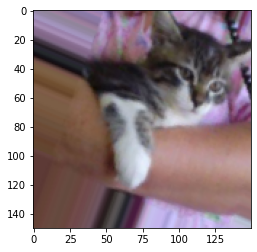

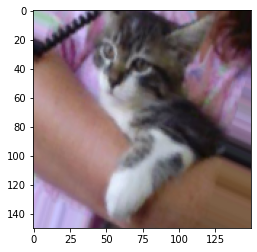

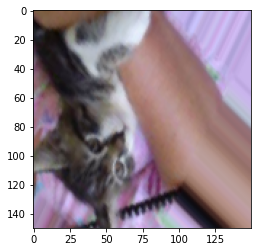

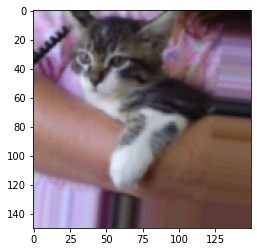

In [38]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import os

train_cats_dir = train_dir = os.path.join('train', 'cats')
fnames = sorted([os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)])

# 테스트 이미지 선택
img_path = fnames[77]
# 이미지 읽고 크기 변경
img = image.load_img(img_path, target_size=(150,150))

# (150, 150, 3) 배열 변환
x = image.img_to_array(img)

# (1, 150, 150, 3) 변환
x = x.reshape((1,) + x.shape)

# 랜덤하게 변환된 이미지 배치 생성
i = 0

for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [39]:
# 2. Data Preprocessing

# train_dir
# valid_dir
# test_dir

train_dir = 'train'
valid_dir = 'validation'
test_dir = 'test'

In [40]:
# Normalization -> ImageDataGenerator()
# Resizing & Generator -> flow_from_directory()

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# With Augmentation
train_datagen = ImageDataGenerator(rescale = 1./255,
                             rotation_range = 40,
                             width_shift_range = 0.2,
                             height_shift_range = 0.2,
                             shear_range = 0.2,
                             zoom_range = 0.2,
                             horizontal_flip = True,
                             vertical_flip = True,
                             fill_mode = 'nearest')
# Without Augmentation
valid_datagen = ImageDataGenerator(rescale = 1./255)

# With Augmentation
train_generator = train_datagen.flow_from_directory(
                  train_dir,
                  target_size = (150, 150),
                  batch_size = 20,
                  class_mode = 'binary')

# Without Augmentation
valid_generator = valid_datagen.flow_from_directory(
                  valid_dir,
                  target_size = (150, 150),
                  batch_size = 20,
                  class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [41]:
# 3. CNN Keras Modeling

# Feature Extraction & Classification

from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [42]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)      

In [43]:
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [44]:
%%time
# epochs : 60 -> 100

Hist_dandc = model.fit(train_generator,
                       steps_per_epoch = 100,
                       epochs = 100,
                       validation_data = valid_generator,
                       validation_steps = 50)

Epoch 1/100
100/100 [==============================] - 21s 199ms/step - loss: 0.6984 - accuracy: 0.4990 - val_loss: 0.6915 - val_accuracy: 0.5130
Epoch 2/100
100/100 [==============================] - 19s 192ms/step - loss: 0.6854 - accuracy: 0.5450 - val_loss: 0.6871 - val_accuracy: 0.5300
Epoch 3/100
100/100 [==============================] - 19s 192ms/step - loss: 0.6759 - accuracy: 0.5700 - val_loss: 0.6794 - val_accuracy: 0.5510
Epoch 4/100
100/100 [==============================] - 19s 192ms/step - loss: 0.6605 - accuracy: 0.5945 - val_loss: 0.6678 - val_accuracy: 0.5990
Epoch 5/100
100/100 [==============================] - 19s 191ms/step - loss: 0.6586 - accuracy: 0.5945 - val_loss: 0.6571 - val_accuracy: 0.5690
Epoch 6/100
100/100 [==============================] - 19s 194ms/step - loss: 0.6611 - accuracy: 0.6045 - val_loss: 0.6625 - val_accuracy: 0.5860
Epoch 7/100
100/100 [==============================] - 20s 200ms/step - loss: 0.6537 - accuracy: 0.6195 - val_loss: 0.6304 -

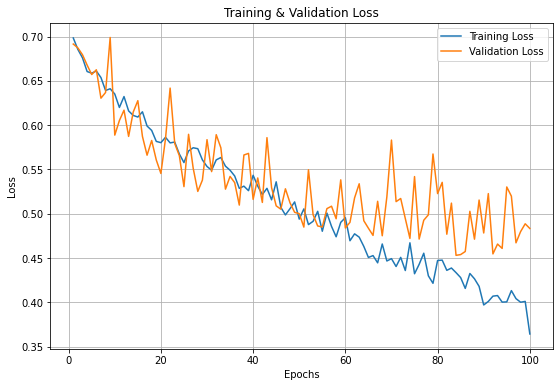

In [45]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_dandc.history['loss']) + 1)

plt.figure(figsize=(9,6))
plt.plot(epochs, Hist_dandc.history['loss'])
plt.plot(epochs, Hist_dandc.history['val_loss'])

plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

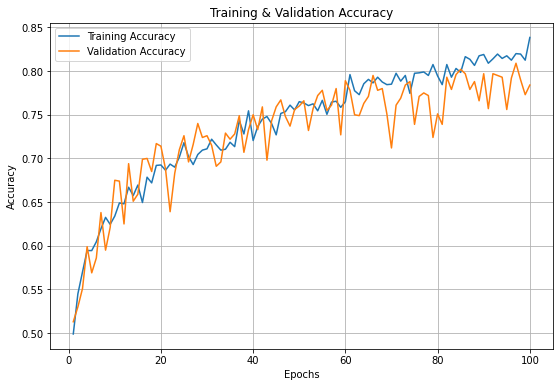

In [46]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_dandc.history['loss']) + 1)

plt.figure(figsize=(9,6))
plt.plot(epochs, Hist_dandc.history['accuracy'])
plt.plot(epochs, Hist_dandc.history['val_accuracy'])

plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()
plt.show()

In [47]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = test_datagen.flow_from_directory(
                 test_dir,
                 target_size = (150,150),
                 batch_size = 20,
                 class_mode = 'binary')

Found 1000 images belonging to 2 classes.


In [48]:
loss, accuracy = model.evaluate(test_generator,
                                steps = 50)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

50/50 [==============================] - 3s 63ms/step - loss: 0.5683 - accuracy: 0.7770
Loss = 0.56833
Accuracy = 0.77700


In [49]:
# 5. Model Save & Load to Google Drive

from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
model.save('/content/drive/My Drive/Colab Notebooks/models/002_dogs_and_cats_augmentation.h5')

In [51]:
!ls -l '/content/drive/My Drive/Colab Notebooks/models'

total 216255
-rw------- 1 root root     34600 Sep 28 08:01 001_Model_iris.h5
-rw------- 1 root root  41499632 Sep 30 09:40 002_dogs_and_cats_augmentation.h5
-rw------- 1 root root 179909880 Sep 30 07:19 002_dogs_and_cats_small.h5


In [52]:
from tensorflow.keras.models import load_model

model_small = load_model('/content/drive/My Drive/Colab Notebooks/models/002_dogs_and_cats_augmentation.h5')

In [53]:
loss, accuracy = model_small.evaluate(test_generator,
                                      steps = 50)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

50/50 [==============================] - 3s 65ms/step - loss: 0.5683 - accuracy: 0.7770
Loss = 0.56833
Accuracy = 0.77700
